# Статистики и арифметические операции

Импорт библиотек

In [1]:
import polars as pl
import datetime as dt

Создадим *DataFrame* на основе словаря. Имеем усредненные данные по результатам ЕГЭ с 2014 по 2024 год по следующим предметам:
- русский язык;
- математика;
- обществознание;
- физика;
- инорматика.

In [2]:
dict_USE = {
    "year": [x for x in range(2014, 2025)],
    "russian_language": [62.5, 65.8, 68, 69.1, 70.93, 69.5, 71.6, 71.4, 68.3, 66.4, 63.9],
    "mathematics": [46.4, 45.5, 46.2, 47.1, 49.8, 56.5, 54.2, 55.1, 56.9, 55.6, 62.5],
    "social science": [53.1, 58.6, 53.1, 55.4, 55.7, 54.9, 56.3, 56.4, 59.9, 56.4, 55],
    "physics": [45.7, 51.4, 50, 53.2, 53.2, 54.4, 54.5, 55.1, 54.1, 54.8, 63.2],
    "informatics": [57.2, 54, 56.6, 59.2, 58.4, 62.4, 61.19, 62.8, 59.5, 58.4, 54.5]
}

df = pl.DataFrame(data=dict_USE)

print(df)

shape: (11, 6)
┌──────┬──────────────────┬─────────────┬────────────────┬─────────┬─────────────┐
│ year ┆ russian_language ┆ mathematics ┆ social science ┆ physics ┆ informatics │
│ ---  ┆ ---              ┆ ---         ┆ ---            ┆ ---     ┆ ---         │
│ i64  ┆ f64              ┆ f64         ┆ f64            ┆ f64     ┆ f64         │
╞══════╪══════════════════╪═════════════╪════════════════╪═════════╪═════════════╡
│ 2014 ┆ 62.5             ┆ 46.4        ┆ 53.1           ┆ 45.7    ┆ 57.2        │
│ 2015 ┆ 65.8             ┆ 45.5        ┆ 58.6           ┆ 51.4    ┆ 54.0        │
│ 2016 ┆ 68.0             ┆ 46.2        ┆ 53.1           ┆ 50.0    ┆ 56.6        │
│ 2017 ┆ 69.1             ┆ 47.1        ┆ 55.4           ┆ 53.2    ┆ 59.2        │
│ 2018 ┆ 70.93            ┆ 49.8        ┆ 55.7           ┆ 53.2    ┆ 58.4        │
│ …    ┆ …                ┆ …           ┆ …              ┆ …       ┆ …           │
│ 2020 ┆ 71.6             ┆ 54.2        ┆ 56.3           ┆ 54.5    ┆ 61.

## Арифметические операции

В *polars* доступны все стандартные арифметические операции над столбцами *DataFrame*, такие как:
- Сложение `+`
- Вычитание `-`
- Умножение `*`
- Деление `/`
- Целочисленное деление `//`
- Остаток от деления `%`
- Возведение в степень `**`

In [3]:
df_new = df.with_columns([
    # Сумма баллов по русскому языку и математике
    (pl.col("russian_language") + pl.col("mathematics")).alias("sum_rus_math"),
    # Разница между русским и математикой
    (pl.col("russian_language") - pl.col("mathematics")).alias("diff_rus_math"),
    # Удвоить балл по математике
    (pl.col("mathematics") * 2).alias("double_math"),
    # Среднее значение между русским и математикой
    ((pl.col("russian_language") + pl.col("mathematics")) / 2).alias("avg_rus_math"),
    # Целая часть от деления физики на математику
    (pl.col("physics") // pl.col("mathematics")).alias("floor_div_phys_math"),
    # Остаток от деления физики на математику
    (pl.col("physics") % pl.col("mathematics")).alias("mod_phys_math"),
    # Квадрат оценок по математике
    (pl.col("mathematics") ** 2).alias("squared_math") 
])

print(df_new)

shape: (11, 13)
┌──────┬────────────┬────────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ year ┆ russian_la ┆ mathematic ┆ social     ┆ … ┆ avg_rus_ma ┆ floor_div ┆ mod_phys_ ┆ squared_m │
│ ---  ┆ nguage     ┆ s          ┆ science    ┆   ┆ th         ┆ _phys_mat ┆ math      ┆ ath       │
│ i64  ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---        ┆ h         ┆ ---       ┆ ---       │
│      ┆ f64        ┆ f64        ┆ f64        ┆   ┆ f64        ┆ ---       ┆ f64       ┆ f64       │
│      ┆            ┆            ┆            ┆   ┆            ┆ f64       ┆           ┆           │
╞══════╪════════════╪════════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 2014 ┆ 62.5       ┆ 46.4       ┆ 53.1       ┆ … ┆ 54.45      ┆ 0.0       ┆ 45.7      ┆ 2152.96   │
│ 2015 ┆ 65.8       ┆ 45.5       ┆ 58.6       ┆ … ┆ 55.65      ┆ 1.0       ┆ 5.9       ┆ 2070.25   │
│ 2016 ┆ 68.0       ┆ 46.2       ┆ 53.1       ┆ … ┆ 57.1       ┆ 1.0       

## Статистика

В *polars* доступен широкий набор статистических методов, которые можно применять как к отдельным столбцам (*Series*), так и ко всему *DataFrame*. Эти методы позволяют быстро рассчитывать:
- меры центральной тенденции (среднее, медиана);
- меры разброса (дисперсия, стандартное отклонение);
- корреляции;
- квантили;

и многое другое.

### Описательная статистика. Метод `describe()`

Метод `describe()` используется для просмотра некоторых базовых статистических данных, таких как:
- количество,
- количество не null значений,
- среднее,
- медиана,
- стандартное отклонение,
- минимум,
- максимум,
- процентили.

In [4]:
df.describe()

statistic,year,russian_language,mathematics,social science,physics,informatics
str,f64,f64,f64,f64,f64,f64
"""count""",11.0,11.0,11.0,11.0,11.0,11.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",2019.0,67.948182,52.345455,55.890909,53.6,58.562727
"""std""",3.316625,3.018035,5.627675,2.04277,4.219953,2.897461
"""min""",2014.0,62.5,45.5,53.1,45.7,54.0
"""25%""",2017.0,66.4,47.1,55.0,53.2,57.2
"""50%""",2019.0,68.3,54.2,55.7,54.1,58.4
"""75%""",2022.0,70.93,56.5,56.4,54.8,61.19
"""max""",2024.0,71.6,62.5,59.9,63.2,62.8


Метод `describe()` имеет два параметра:
- `percentiles` - Задаёт один или несколько процентилей для включения в сводную статистику. Все значения должны быть в диапазоне [0, 1].
- `interpolation` - Отвечает за способ вычисления квантилей, когда точное значение квантиля находится между двумя элементами в отсортированном массиве.

**Параметр `percentiles`**

Зададим свои уровни процентилей. Например, выведем 30 и 70 процентиль:

In [5]:
df.describe(percentiles=[0.3, 0.7])

statistic,year,russian_language,mathematics,social science,physics,informatics
str,f64,f64,f64,f64,f64,f64
"""count""",11.0,11.0,11.0,11.0,11.0,11.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",2019.0,67.948182,52.345455,55.890909,53.6,58.562727
"""std""",3.316625,3.018035,5.627675,2.04277,4.219953,2.897461
"""min""",2014.0,62.5,45.5,53.1,45.7,54.0
"""30%""",2017.0,66.4,47.1,55.0,53.2,57.2
"""70%""",2021.0,69.5,55.6,56.4,54.5,59.5
"""max""",2024.0,71.6,62.5,59.9,63.2,62.8


**Параметр `interpolation`**

Параметр `interpolation` в методе `describe()` отвечает за способ вычисления квантилей, когда точное значение квантиля находится между двумя элементами в отсортированном массиве.

Например, когда запрашиваешь 25-й процентиль (0.25), и данные не позволяют точно попасть на одно из значений, *polars* должен оценить это значение между двумя соседними числами. Вот здесь и используется метод интерполяции.

Доступные методы:
| Метод                 | Описание                                                                    |
|-----------------------|-----------------------------------------------------------------------------|
| **`'nearest'`**       | Берёт ближайшее значение из выборки                                         |
| **`'linear'`**        | Линейная интерполяция между двумя соседними значениями                      |
| **`'higher'`**        | Всегда выбирает большее из двух соседних                                    |
| **`'lower'`**         | Всегда выбирает меньшее из двух соседних                                    |
| **`'midpoint'`**      | Среднее арифметическое двух соседних                                        |
| **`'equiprobable'`**  | Распределение вероятностей равномерно между элементами (редко используется) |

Пример: 
Допустим, у нас есть столбец `pl.Series([1, 3, 5, 7])`, и мы хотим найти квантиль 0.3 (30-й процентиль).

Исходя из формулы: 
$
i = (n - 1) \cdot q = (4 - 1) \cdot 0.3 = 0.9
$

Это значит — результат будет интерполирован между элементом под индексом 0 (значение 1) и 1 (значение 3)

В зависимости от метода:

| Метод                 | Результат           |
|-----------------------|---------------------|
| **`'nearest'`**       | 3                   |
| **`'linear'`**        | 1 + 0.9*(3–1) = 2.8 |
| **`'higher'`**        | 3                   |
| **`'lower'`**         | 1                   |
| **`'midpoint'`**      | (1+3)/2 = 2         |

### Статистические функции

Есть следующие методы:
1. Вычисление по столбцам (вдоль оси строк):
    - `mean()` - среднее значение
    - `median()` - медиана
    - `std()` - стандартное отклонение
    - `var()` - дисперсия
    - `min()`/`max()` - минимум и максимум
    - `count()` - количетсво не null значений
    - `null_count()` - количество null значений
    - `sum()` - сумма
    - `product()` - произведение
    - `quantile()` - квантиль   
2. Вычисление по горизонтали в столбцах (вдоль оси столбцов):
    - `mean_horizontal()` - среднее значение по горизонтали в столбцах
    - `min_horizontal()`/`max_horizontal()` - минимум и максимум
    - `sum_horizontal()` - сумма
3. Вычисление по кажому столбцу отдельно:
    - `cum_count()` - накопительное количество значений по столбцу
    - `cum_sum()` - накопительная сумма по столбцу
    - `cum_sum_horizontal()` - накопительная сумма по горизонтали (по текущей строке)
    - `n_unique()` - количество уникальных значений
    - `mode()` - мода
    - `rank()` - ранг
4. Ещё некоторые статистические методы:
   - `corr()` - корреляция
   - `skew()` - асимметрия
   - `kurtosis()` - эксцесс
   - `cov()` - ковариация

#### **Вычисление по столбцам (вдоль оси строк)**

Чаще всего пользуются методом `describe()`, но если нужна одна статистическая мера, то можно по отдельности применить конкретный метод. В примере отражена сводная всех метрик.

In [6]:
df_metrics = pl.concat([
    df.mean().with_columns(pl.lit("mean").alias("metrics")).select(pl.col(df.columns).cast(pl.Float64), pl.col("metrics").cast(pl.Utf8)),
    df.median().with_columns(pl.lit("median").alias("metrics")).select(pl.col(df.columns).cast(pl.Float64), pl.col("metrics").cast(pl.Utf8)),
    df.std().with_columns(pl.lit("std").alias("metrics")).select(pl.col(df.columns).cast(pl.Float64), pl.col("metrics").cast(pl.Utf8)),
    df.var().with_columns(pl.lit("var").alias("metrics")).select(pl.col(df.columns).cast(pl.Float64), pl.col("metrics").cast(pl.Utf8)),
    df.min().with_columns(pl.lit("max").alias("metrics")).select(pl.col(df.columns).cast(pl.Float64), pl.col("metrics").cast(pl.Utf8)),
    df.max().with_columns(pl.lit("min").alias("metrics")).select(pl.col(df.columns).cast(pl.Float64), pl.col("metrics").cast(pl.Utf8)),
    df.count().with_columns(pl.lit("count").alias("metrics")).select(pl.col(df.columns).cast(pl.Float64), pl.col("metrics").cast(pl.Utf8)),
    df.null_count().with_columns(pl.lit("null_count").alias("metrics")).select(pl.col(df.columns).cast(pl.Float64), pl.col("metrics").cast(pl.Utf8)),
    df.sum().with_columns(pl.lit("sum").alias("metrics")).select(pl.col(df.columns).cast(pl.Float64), pl.col("metrics").cast(pl.Utf8)),
    df.product().with_columns(pl.lit("product").alias("metrics")).select(pl.col(df.columns).cast(pl.Float64), pl.col("metrics").cast(pl.Utf8)),
    df.quantile(0.3).with_columns(pl.lit("quantile-0.3").alias("metrics")).select(pl.col(df.columns).cast(pl.Float64), pl.col("metrics").cast(pl.Utf8))
])

df_metrics

year,russian_language,mathematics,social science,physics,informatics,metrics
f64,f64,f64,f64,f64,f64,str
2019.0,67.948182,52.345455,55.890909,53.6,58.562727,"""mean"""
2019.0,68.3,54.2,55.7,54.1,58.4,"""median"""
3.316625,3.018035,5.627675,2.04277,4.219953,2.897461,"""std"""
11.0,9.108536,31.670727,4.172909,17.808,8.395282,"""var"""
2014.0,62.5,45.5,53.1,45.7,54.0,"""max"""
…,…,…,…,…,…,…
11.0,11.0,11.0,11.0,11.0,11.0,"""count"""
0.0,0.0,0.0,0.0,0.0,0.0,"""null_count"""
22209.0,747.43,575.8,614.8,589.6,644.19,"""sum"""


Здесь используется метод `concat()`, который склеивает несколько *DataFrame* вместе, и пытается сделать все значения в кажом отдельном столбце одного типа, и может выдать ошибку, если не совпадают типы. В *polars* все строки одного столбца должны иметь одинаковый тип данных. Поэтому до склейки, используем конструкцию `select(pl.col(df.columns).cast(pl.Float64), pl.col("metrics").cast(pl.Utf8))`, которая всем исходным столбцам задает тип данных `Float64`, а колонке "metrics" - `Utf8`.

#### **Вычисление по горизонтали в столбцах (вдоль оси столбцов)**

В *polars* реализованы методы (среднее, минимум, максимум и сумма), которые могут вычислить значение для каждой строки (т.е. вдоль оси столбцов).

In [7]:
df.with_columns([
    df.mean_horizontal().alias("mean"),
    df.min_horizontal().alias("min"),
    df.max_horizontal().alias("max"),
    df.sum_horizontal().alias("sum")
])


year,russian_language,mathematics,social science,physics,informatics,mean,min,max,sum
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2014,62.5,46.4,53.1,45.7,57.2,379.816667,45.7,2014.0,2278.9
2015,65.8,45.5,58.6,51.4,54.0,381.716667,45.5,2015.0,2290.3
2016,68.0,46.2,53.1,50.0,56.6,381.65,46.2,2016.0,2289.9
2017,69.1,47.1,55.4,53.2,59.2,383.5,47.1,2017.0,2301.0
2018,70.93,49.8,55.7,53.2,58.4,384.338333,49.8,2018.0,2306.03
…,…,…,…,…,…,…,…,…,…
2020,71.6,54.2,56.3,54.5,61.19,386.298333,54.2,2020.0,2317.79
2021,71.4,55.1,56.4,55.1,62.8,386.966667,55.1,2021.0,2321.8
2022,68.3,56.9,59.9,54.1,59.5,386.783333,54.1,2022.0,2320.7


При передаче `df.sum_horizontal()` *polars* считает все значения внутри одной строки. Если в *DataFrame* есть нечисловые типы данных (например, строки, даты), то в новом поле по сумме *polars* сделает конкатенацию строк, а значения  null обработает/запишет от типа данных в столбце.

In [8]:
df1 = pl.DataFrame(
    {
        "a": [1, 8, 3],
        "b": [4, 5, None],
        "c": ["x", "y", "z"],
        "d": [dt.date.today(), None, None]
    }
)
print(df1)

df1.with_columns(df1.sum_horizontal())


shape: (3, 4)
┌─────┬──────┬─────┬────────────┐
│ a   ┆ b    ┆ c   ┆ d          │
│ --- ┆ ---  ┆ --- ┆ ---        │
│ i64 ┆ i64  ┆ str ┆ date       │
╞═════╪══════╪═════╪════════════╡
│ 1   ┆ 4    ┆ x   ┆ 2025-06-27 │
│ 8   ┆ 5    ┆ y   ┆ null       │
│ 3   ┆ null ┆ z   ┆ null       │
└─────┴──────┴─────┴────────────┘


a,b,c,d,sum
i64,i64,str,date,str
1,4,"""x""",2025-06-27,"""5x2025-06-27"""
8,5,"""y""",null,"""13y1970-01-01"""
3,null,"""z""",null,"""3z1970-01-01"""


Другие методы (минимум, максимум и сумма) упадут с ошибкой.

Чтобы все корректно отрабатоло, необходимо внутрь данных методов передать наименование столбцов, по которым производить рассчёт.

In [9]:
df.with_columns([
    pl.mean_horizontal("russian_language", "social science").alias("mean_by_russlang_and_social"),
    pl.min_horizontal("russian_language", "mathematics", "social science", "physics", "informatics").alias("min"),
    pl.max_horizontal("russian_language", "mathematics", "social science", "physics", "informatics").alias("max"),
    pl.sum_horizontal("russian_language", "mathematics", "social science").alias("sum_rms")
])

year,russian_language,mathematics,social science,physics,informatics,mean_by_russlang_and_social,min,max,sum_rms
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2014,62.5,46.4,53.1,45.7,57.2,57.8,45.7,62.5,162.0
2015,65.8,45.5,58.6,51.4,54.0,62.2,45.5,65.8,169.9
2016,68.0,46.2,53.1,50.0,56.6,60.55,46.2,68.0,167.3
2017,69.1,47.1,55.4,53.2,59.2,62.25,47.1,69.1,171.6
2018,70.93,49.8,55.7,53.2,58.4,63.315,49.8,70.93,176.43
…,…,…,…,…,…,…,…,…,…
2020,71.6,54.2,56.3,54.5,61.19,63.95,54.2,71.6,182.1
2021,71.4,55.1,56.4,55.1,62.8,63.9,55.1,71.4,182.9
2022,68.3,56.9,59.9,54.1,59.5,64.1,54.1,68.3,185.1


#### **Вычисление по кажому столбцу отдельно**

Чтобы посчитать кодичество уникальных значений в столбце или накопительное количество значений/сумму по столбцу/сумму по горизонтали, необходимо методу передать наименование колонки. Или же к выбранной колонки *DataFrame* передать метод.

In [10]:
df.select([
    "year",
    "mathematics",
    "informatics",
    "physics",
    pl.cum_sum("mathematics").alias("cum_sum_mathematics"),
    pl.cum_sum_horizontal("mathematics", "informatics").alias("cum_sum_horizontal_math_and_informatics"),
    pl.col("physics").cum_count().alias("cum_count_physics"),
    pl.n_unique("physics").alias("n_unique_physics"),
    pl.col("physics").mode().first().alias("mode_physics"),
    pl.col("mathematics").rank(method="max").alias("rank_math")
])

year,mathematics,informatics,physics,cum_sum_mathematics,cum_sum_horizontal_math_and_informatics,cum_count_physics,n_unique_physics,mode_physics,rank_math
i64,f64,f64,f64,f64,struct[2],u32,u32,f64,u32
2014,46.4,57.2,45.7,46.4,"{46.4,103.6}",1,10,53.2,3
2015,45.5,54.0,51.4,91.9,"{45.5,99.5}",2,10,53.2,1
2016,46.2,56.6,50.0,138.1,"{46.2,102.8}",3,10,53.2,2
2017,47.1,59.2,53.2,185.2,"{47.1,106.3}",4,10,53.2,4
2018,49.8,58.4,53.2,235.0,"{49.8,108.2}",5,10,53.2,5
…,…,…,…,…,…,…,…,…,…
2020,54.2,61.19,54.5,345.7,"{54.2,115.39}",7,10,53.2,6
2021,55.1,62.8,55.1,400.8,"{55.1,117.9}",8,10,53.2,7
2022,56.9,59.5,54.1,457.7,"{56.9,116.4}",9,10,53.2,10


Здесть мы также считаем моду (значение, которое встречается наиболее часто в наборе данных) методом `mode()`. Поскольку метод `mode()` возвращает *Series*, содержащий все наиболее часто встречающиеся значения (моды), то их, вероятно, только одно-два значения. Поэтому он возвращает Series длины 1.

In [11]:
df["physics"].mode()

physics
f64
53.2


Но при использовании метода `select()` все выражения должны возвращать значения той же длины, что и исходный датафрейм (в данном случае — 11 строк).
Чтобы исправить возможную ошибку, нужно явно указать, что хотим повторить значение моды для всех строк. Это можно сделать через метод `first()`.

Метод `rank()` помогает ранжировать столбец по определенному правилу. Внутри него есть параметр `method`, который помогает задать правило.

#### **Ещё некоторые статистические методы**

##### **Метод `skew()`**

Метод `skew()` вычисляет асимметрию (скошенность) распределения значений в столбце. Это статистическая мера, которая показывает:
1. насколько распределение данных отклоняется от симметричного (например, нормального);
2. в какую сторону "скошено" большинство значений.

Интерпретировать значения асимметрии можно следующим образом:
- skew ≈ 0 - Распределение симметричное
- skew > 0 - Правый хвост длиннее 
- skew < 0 - Левый хвост длиннее

Наглядное представление о скошенности дает следующий график

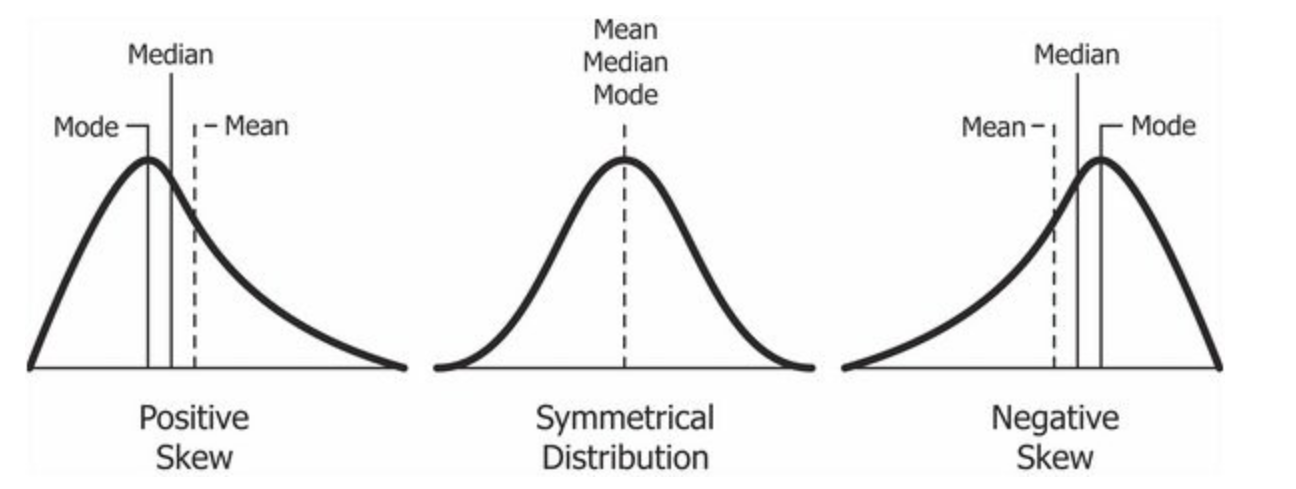

In [12]:
df.select(
    pl.col("mathematics").skew().alias("skew_mathematics"),
    pl.col("physics").skew().alias("skew_physics"),
    pl.col("russian_language").skew().alias("skew_russian_language")
)

skew_mathematics,skew_physics,skew_russian_language
f64,f64,f64
0.206644,0.475542,-0.457953


##### **Метод `kurtosis()`**

Метод `kurtosis()` вычисляет коэффициент эксцесса. Это статистическая мера, которая описывает "остроту" или "плоскость" пика распределения случайно величины. При помощи неё можно отследить следующее:
1. Насколько "тяжёлые" хвосты.
2. Как много выбросов.
3. Какие пики: острые или плоские.

Интерпретировать значения эксцесса можно следующим образом:
- kurtosis ≈ 0 - Распределение похаже на нормальное 
- kurtosis > 0 - Острый пик, тяжёлые хвосты (много выбросов)
- kurtosis < 0 - Плоский пик, лёгкие хвосты (мало выбросов)

Наглядное представление о скошенности дает следующий график

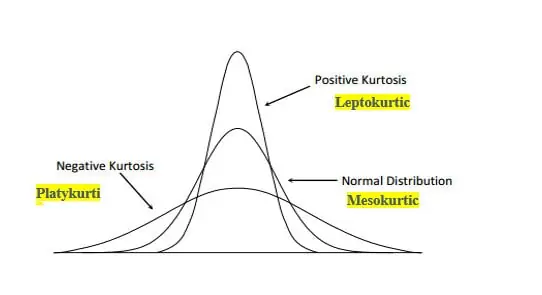

In [13]:
df.select(
    pl.col("mathematics").kurtosis().alias("skew_mathematics"),
    pl.col("physics").kurtosis().alias("skew_physics"),
    pl.col("russian_language").kurtosis().alias("skew_russian_language")
)

skew_mathematics,skew_physics,skew_russian_language
f64,f64,f64
-1.112273,1.366417,-0.90104


##### **Метод `cov()`**

Метод `cov()` вычисляет ковариацию. Это статистическая мера, которая показывает насколько две переменные изменяются вместе. Интерпретировать значения можно следующим образом:
- Если ковариация положительная → переменные меняются в одну сторону.
- Если ковариация отрицательная → переменные меняются в противоположных направлениях.
- Если ковариация ≈ 0 → связи между изменениями нет.

Важно: ковариация зависит от масштаба данных, поэтому её сложно интерпретировать напрямую.

In [14]:
print(df.select(x=pl.cov("mathematics", "physics")))

shape: (1, 1)
┌────────┐
│ x      │
│ ---    │
│ f64    │
╞════════╡
│ 20.006 │
└────────┘


In [15]:
df.select(pl.col("mathematics").n_unique())

mathematics
u32
11


##### **Коререляция. Метод `corr()`**

**Корреляция** - это статистическая мера взаимосвязи между двумя случайными величинами. Она показывает существует ли зависимость между переменными и насколько она сильна.

Основные характеристики корреляции:
1. Числовой показатель, который варьируется от -1 до +1:
   - Значение +1 указывает на полною положительную корреляцию, т.е. при увеличении одной переменной другая также увеличивается.
   - Значение -1 указывает на полную отрицательную корреляцию, т.е. при увеличении одной переменной другая уменьшается.
   - Значение 0 указывает на отсутсвие корреляции, т.е. обе переменные линейно независимы друг от друга.
2. Типы корреляции:
   - Положительная корреляция: оба значения увеличиваются или уменьшаются вместе.
   - Отрицательная корреляция: одна переменная увеличивается, а другая уменьшается.
3. Необязательно причинная связь:
   - Корреляция не подразумевает причинно-следственной связи. Например, наличие корреляции между количеством мороженого, проданного летом, и количеством утоплений не означает, что продажа мороженого вызывает утопления; скорее, обе переменные могут зависеть от температуры.
  
Корреляция широко используется в различных областях, включая экономику, социологию, психологию и естественные науки, для анализа данных и выявления закономерностей.

Наглядное представление о связи двух переменных дает следующий график

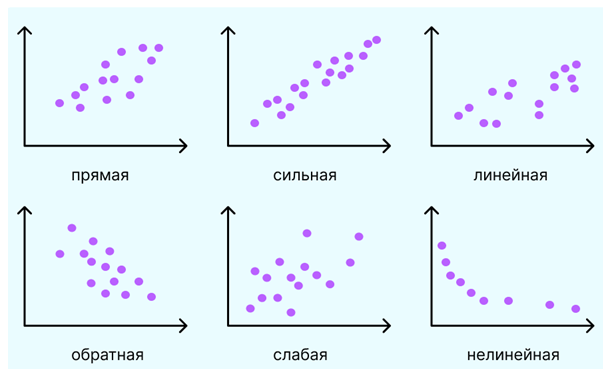

Сила связи можно определить по абсолютному значению коэффициента корреляции:

| Значение коэффициента (по модулю) | Корреляция |
|-----------------------------------|------------|
| 0 - 0.1  | Почти нет связи |
| 0.1 - 0.3  | Слабая связь |
| 0.3 - 0.5  | Умеренная связь |
| 0.5 - 0.7  | Средняя связь |
| 0.7 - 0.9  | Сильная связь |
| 0.9 - 1  | Очень сильная связь |

Корреляцию можно вычислить при помощи `corr()`, причем сразу для всего *DataFrame*. 

In [16]:
df.corr()

year,russian_language,mathematics,social science,physics,informatics
f64,f64,f64,f64,f64,f64
1.0,0.155549,0.929017,0.34981,0.846671,0.237154
0.155549,1.0,0.066713,0.227875,0.118468,0.738472
0.929017,0.066713,1.0,0.236382,0.84241,0.266403
0.34981,0.227875,0.236382,1.0,0.241404,0.056806
0.846671,0.118468,0.84241,0.241404,1.0,0.00606
0.237154,0.738472,0.266403,0.056806,0.00606,1.0


Или же только между двумя признаками

In [17]:
print(df.select(pl.corr("mathematics", "physics").alias("corr")))

shape: (1, 1)
┌─────────┐
│ corr    │
│ ---     │
│ f64     │
╞═════════╡
│ 0.84241 │
└─────────┘


Величина корреляции между этими двумя предметами находится в диапазоне между 0.7 и 0.9, что соответствует сильной положительной связи, т.е. чем выше баллы по математике, тем выше и по физике.